In [1]:
include("src/cpa.jl")

run_method (generic function with 1 method)

In [2]:
nq = 9
steps = 11
T = steps/20
J =  2.0 # J > 0 in ferromagnetic phase, J < 0 in antiferromagnetic phase
h = 1.0  #abs(h) < abs(J) in ordered phase
angle_definition = pi/20
trotter = trotter_setup(nq, steps, T, J, h);
observable= obs_interaction(trotter);
min_abs_coeff = 0.0;

# Plain CDR
- Target data (exact and noisy)

In [3]:
exact_expval_target = trotter_time_evolution(trotter; observable = observable, record=true, min_abs_coeff=min_abs_coeff,max_weight = Inf);

In [4]:
noisy_expval_target = trotter_time_evolution(trotter; observable = observable, noise_kind="gate_ising", record=true, min_abs_coeff=min_abs_coeff);

In orange, we plot the time evolution we want to correct. In blue, we see the exact evolution using PauliPropagation.

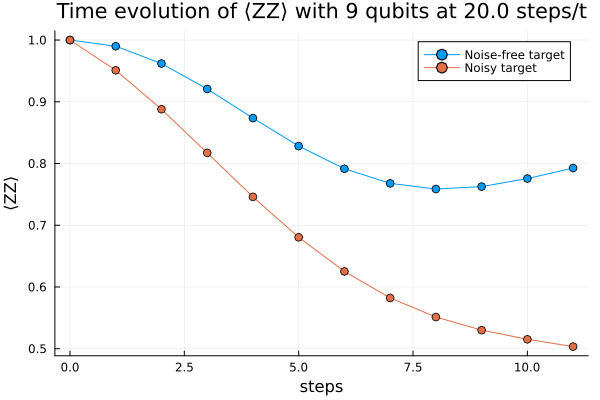

In [5]:
plot(0:trotter.steps, exact_expval_target, xlabel="steps", label="Noise-free target", marker=:o)
plot!(0:trotter.steps, noisy_expval_target, label="Noisy target", marker=:o)

if observable == obs_interaction(trotter)
    plot!(ylabel="⟨ZZ⟩", title = "Time evolution of ⟨ZZ⟩ with $(trotter.nqubits) qubits at $(trotter.steps/trotter.time) steps/t")
elseif observable == obs_magnetization(trotter)
    plot!(ylabel="⟨Z⟩",title = "Time evolution of ⟨Z⟩ with $(trotter.nqubits) qubits at $(trotter.steps/trotter.time) steps/t")
end

### Training data
- create a training set using one of the predefined methods, here the CPA "loose" method

In [6]:
list_training_thetas = training_set_generation_loose_perturbation(trotter;sample_function = "small", num_samples=7);

In [7]:
exact_expvals_training = training_trotter_time_evolution(trotter, list_training_thetas; observable = observable, record=true)

7-element Vector{Vector{Float64}}:
 [1.0, 0.990033288920621, 0.9610207763624994, 0.915525783640269, 0.8575012428981168, 0.791852962095457, 0.7239066803834597, 0.658844579586751, 0.6011794132582687, 0.5543279666318356, 0.5203311987632875, 0.4997482494480109]
 [1.0, 0.990033288920621, 0.9611277393511697, 0.9161424748859406, 0.8594447859106905, 0.7963719000568983, 0.7325856685191396, 0.6734086490434835, 0.6232306777607275, 0.5850626548829723, 0.5602910403400357, 0.5486562161599421]
 [1.0, 0.990033288920621, 0.960667024089791, 0.9134688237580789, 0.8509404976878638, 0.7763599434643824, 0.6935756160434368, 0.6067679438500038, 0.5201942407746134, 0.4379346049376916, 0.3636559431066718, 0.30040965593241414]
 [1.0, 0.990033288920621, 0.9610112064974108, 0.9154704897872182, 0.8573264507692542, 0.7914449513804499, 0.7231192553771442, 0.6575155488353059, 0.5991535252420338, 0.5514824115063741, 0.5165991242337605, 0.49513588106191037]
 [1.0, 0.990033288920621, 0.9605408512608173, 0.912728696439176

In [8]:
exact_expvals_training_3 = [row[3] for row in exact_expvals_training]

7-element Vector{Float64}:
 0.9610207763624994
 0.9611277393511697
 0.960667024089791
 0.9610112064974108
 0.9605408512608173
 0.9605607122553272
 0.9608843729959975

In [9]:
noisy_expvals_training = training_trotter_time_evolution(trotter, list_training_thetas; observable = observable, noise_kind="gate_ising", record = true)

7-element Vector{Vector{Float64}}:
 [1.0, 0.9510220271043257, 0.8871266112278998, 0.8127575783897242, 0.7328364903557637, 0.6522249841587899, 0.5752597219057628, 0.5054033632588001, 0.44503533139439977, 0.3953863050719009, 0.35660288317728195, 0.32791559866713843]
 [1.0, 0.9510220271043257, 0.8872233513306517, 0.8132866760190975, 0.7344203347791188, 0.6557267936648001, 0.5816629220932484, 0.5156481480925627, 0.4598494183809034, 0.41514455316352117, 0.3812419944889808, 0.3569178519332394]
 [1.0, 0.9510220271043257, 0.8868066684977602, 0.8109928899516903, 0.7274909992071074, 0.6402242715349705, 0.5528995422715594, 0.46881836568000496, 0.3907361067783896, 0.32077212354150725, 0.2603703171303633, 0.21030601601745513]
 [1.0, 0.9510220271043257, 0.887117955993604, 0.8127101390848693, 0.7326940546581868, 0.6519088434437255, 0.5746788905253005, 0.5044687942901619, 0.4436750244112657, 0.39355833493791026, 0.354304013695698, 0.3251841103393598]
 [1.0, 0.9510220271043257, 0.8866925545209335, 0.81

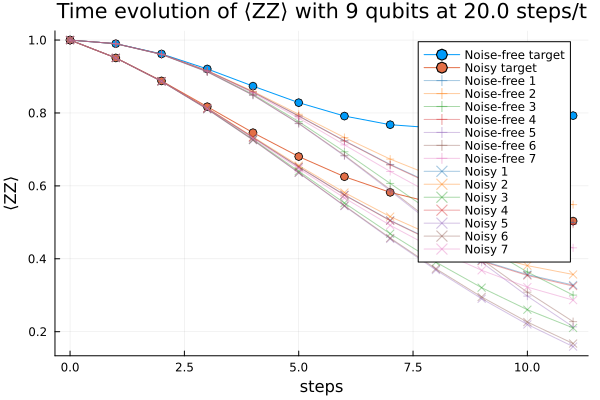

In [10]:
colors = palette(:tab10)

plot(0:trotter.steps, exact_expval_target, xlabel="steps", label="Noise-free target", marker=:o)
plot!(0:trotter.steps, noisy_expval_target, label="Noisy target", marker=:o)

for (i, exact) in enumerate(exact_expvals_training)
    plot!(0:trotter.steps, exact, label="Noise-free $(i)", c=colors[i], marker=:+, alpha = 0.4)
end

for (i, noisy) in enumerate(noisy_expvals_training)
    plot!(0:trotter.steps, noisy, label="Noisy $(i)", color=colors[i], marker=:x, alpha = 0.4)
end

if observable == obs_interaction(trotter)
    plot!(ylabel="⟨ZZ⟩", title = "Time evolution of ⟨ZZ⟩ with $(trotter.nqubits) qubits at $(trotter.steps/trotter.time) steps/t")
else
    plot!(ylabel="⟨Z⟩",title = "Time evolution of ⟨Z⟩ with $(trotter.nqubits) qubits at $(trotter.steps/trotter.time) steps/t")
end

### CDR
1) considering only the last step

In [11]:
noisy_expvals_training_last = [row[end] for row in noisy_expvals_training]
exact_expvals_training_last = [row[end] for row in exact_expvals_training]
noisy_expval_target_last = noisy_expval_target[end]
exact_expval_target_last = exact_expval_target[end]
corr_last, rel_error_after_cdr_last, rel_error_before_cdr_last = cdr(
    noisy_expvals_training_last,
    exact_expvals_training_last,
    noisy_expval_target_last;
    exact_target_exp_value = exact_expval_target_last,
    use_target = true
)
println("noisy_expvals_last = ", noisy_expvals_training_last)

noisy_expvals_last = [0.32791559866713843, 0.3569178519332394, 0.21030601601745513, 0.3251841103393598, 0.15913904249370042, 0.16754892544514113, 0.28673707682138183]


2) CDR for all steps (only considering the current step)

In [12]:
corrected, rel_after_cdr, rel_before_cdr = cdr(
    noisy_expvals_training,
    exact_expvals_training,
    noisy_expval_target; exact_target_exp_value = exact_expval_target, use_target=true
)


nsteps12
i2
noisy_exp_values_last2[0.9510220271043257, 0.9510220271043257, 0.9510220271043257, 0.9510220271043257, 0.9510220271043257, 0.9510220271043257, 0.9510220271043257]
exact_exp_values_last[0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621]
noisy_target_exp_value0.9510220271043257
exact_target_exp_value0.990033288920621
i3
noisy_exp_values_last3[0.8871266112278998, 0.8872233513306517, 0.8868066684977602, 0.887117955993604, 0.8866925545209335, 0.8867105173190797, 0.8870032444845589]
exact_exp_values_last[0.9610207763624994, 0.9611277393511697, 0.960667024089791, 0.9610112064974108, 0.9605408512608173, 0.9605607122553272, 0.9608843729959975]
noisy_target_exp_value0.8879573890567496
exact_target_exp_value0.9619393455412939
i4
noisy_exp_values_last4[0.8127575783897242, 0.8132866760190975, 0.8109928899516903, 0.8127101390848693, 0.8103579652600882, 0.8104581016825955, 0.8120798309883559]
exact_exp_value

([6.9204755743638e-310, 0.9900332889206208, 0.961939345588104, 0.9207430413282895, 0.8736038499242125, 0.82830334579336, 0.7916612425644358, 0.768241388249274, 0.7596246817763793, 0.7643771343708601, 0.7786685939732432, 0.7973457676702355], [2.2427993827067606e-16, 4.866222757145357e-11, 9.76328639172942e-7, 1.0362589149556065e-5, 5.4837947894196156e-5, 0.00019720622756439965, 0.0005437513788684157, 0.0012241730494136423, 0.002342089615345456, 0.003918945749379215, 0.005855001572441496], [0.03940399000000007, 0.07690916982183928, 0.11241871344464158, 0.1461073864499862, 0.17844695913209901, 0.210106717512654, 0.24169264147375952, 0.2734278579757388, 0.30500699024379113, 0.3357572906275757, 0.36497176962332284])

2) CDR with decaying weights

In [13]:
#CDR with decaying weights
decay_weights = [
    [τ == t ? 1.0 : (τ == t-1 ? 0.5 : 0.0) for τ in 1:t]
    for t in 1:length(noisy_expvals_training[1])
]
corrected_weight, rel_after_weight, rel_before_weight = cdr(
    noisy_expvals_training,
    exact_expvals_training,
    noisy_expval_target, decay_weights; exact_target_exp_value = exact_expval_target, use_target=true
);

println("Relative error before CDR: ", size(rel_before_cdr))
println("Relative error after CDR: ", size(rel_after_cdr))
println("Relative error after CDR with decay weights: ", size(rel_after_weight))

Relative error before CDR: (11,)
Relative error after CDR: (11,)
Relative error after CDR with decay weights: (11,)


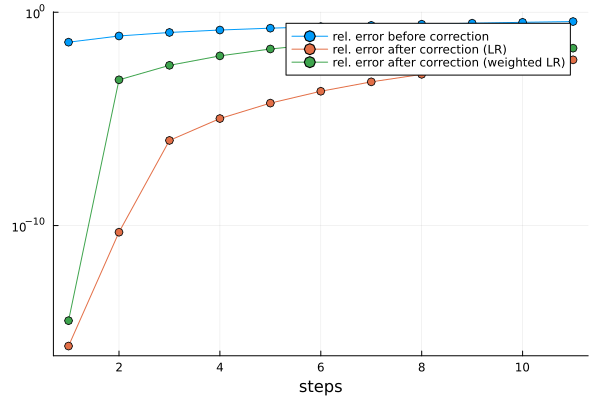

In [14]:
start = 1
plot(start:trotter.steps, rel_before_cdr[start:end], xlabel="steps", label="rel. error before correction", marker=:o)
plot!(start:trotter.steps, rel_after_cdr[start:end], label="rel. error after correction (LR)", marker=:o)
plot!(start:trotter.steps, rel_after_weight[start:end], label="rel. error after correction (weighted LR)", marker=:o, yscale=:log10, legend=:best)

# Plain ZNE
- for last step/ all steps

In [15]:
noisy_expval_target_levels = zne_time_evolution(trotter; observable = observable, noise_kind="gate_ising", record = true);

In [16]:
noisy_exp_last = noisy_expval_target_levels[:,end]

3-element Vector{Float64}:
 0.5033897242151323
 0.4009129707045946
 0.3191463098064843

In [17]:
corrected = zne(noisy_exp_last; exact_target_exp_value = exact_expval_target[end], use_target = true)

(0.6841814565217084, 0.13690224752017832, 0.36497176962332284)

In [18]:
corr_zne, rel_after_zne, rel_before_zne = zne(noisy_expval_target_levels; exact_target_exp_value = exact_expval_target, use_target = true);

In [19]:
println(typeof(corr_zne))

Vector{Float64}


In [20]:
plot(1:trotter.steps, rel_before_zne[2:end], xlabel="steps", label="rel. error before correction", marker=:o)
plot!(1:trotter.steps, rel_after_zne[2:end], label="rel. error after correction (ZNE)", marker=:o, yscale=:log10)

# vnCDR
see Piotr 2021 for vnCDR implementation steps
-  for each circuit from the training data, calculate expectation value at multiple noise levels (e.g 1,1.2,1.5) and the corresponding noiseless expectation value
- vnCDR works with the varied noise levels of the training circuits, while ZNE works with the varied noise levels of the target circuit (implemented above)
- CPDR-ZNE described in the CPA paper is the same idea as vnCDR, but they allow for small angle perturbation from Cliffords and the use a Ridge Regression to reduce overfitting
- implement: vnCDR, which natively extends to CPDR -ZNE with linear regression
- add ridge regression as an option (self implemented, convex.jl, LinearRegressionKit.jl)

In [21]:
exact_expvals_training_levels = training_trotter_time_evolution(
    trotter,
    list_training_thetas;
    observable = observable,
    noise_kind = "noiseless",
    record = true
);

In [22]:
noisy_expvals_training_levels = vnCDR_training_trotter_time_evolution(trotter, list_training_thetas; observable = observable, noise_kind="gate_ising", record = true);

Noisy expval at noise level 1.0: [[1.0, 0.9510220271043257, 0.8871266112278998, 0.8127575783897242, 0.7328364903557637, 0.6522249841587899, 0.5752597219057628, 0.5054033632588001, 0.44503533139439977, 0.3953863050719009, 0.35660288317728195, 0.32791559866713843], [1.0, 0.9510220271043257, 0.8872233513306517, 0.8132866760190975, 0.7344203347791188, 0.6557267936648001, 0.5816629220932484, 0.5156481480925627, 0.4598494183809034, 0.41514455316352117, 0.3812419944889808, 0.3569178519332394], [1.0, 0.9510220271043257, 0.8868066684977602, 0.8109928899516903, 0.7274909992071074, 0.6402242715349705, 0.5528995422715594, 0.46881836568000496, 0.3907361067783896, 0.32077212354150725, 0.2603703171303633, 0.21030601601745513], [1.0, 0.9510220271043257, 0.887117955993604, 0.8127101390848693, 0.7326940546581868, 0.6519088434437255, 0.5746788905253005, 0.5044687942901619, 0.4436750244112657, 0.39355833493791026, 0.354304013695698, 0.3251841103393598], [1.0, 0.9510220271043257, 0.8866925545209335, 0.8103

In [23]:
noisy_expvals_training_levels_end = noisy_expvals_training_levels[:,:,end]

3×7 Matrix{Float64}:
 0.327916  0.356918  0.210306  0.325184  0.159139  0.167549  0.286737
 0.265326  0.287619  0.175164  0.263228  0.136029  0.142458  0.233719
 0.214494  0.23161   0.14546   0.212884  0.115565  0.120474  0.190262

In [24]:
exact_expvals_training_end = [row[end] for row in exact_expvals_training]

7-element Vector{Float64}:
 0.4997482494480109
 0.5486562161599421
 0.30040965593241414
 0.49513588106191037
 0.2133133328193212
 0.22764102399469943
 0.4301164211211444

In [25]:
pred, rel_after, rel_before = vnCDR(
    noisy_expvals_training_levels_end,
    exact_expvals_training_end,
    noisy_exp_last; exact_target_exp_value = exact_expval_target[end], use_target=true, lambda = 0.0
)

X7×3 DataFrame
 Row │ x1        x2        x3       
     │ Float64   Float64   Float64  
─────┼──────────────────────────────
   1 │ 0.327916  0.265326  0.214494
   2 │ 0.356918  0.287619  0.23161
   3 │ 0.210306  0.175164  0.14546
   4 │ 0.325184  0.263228  0.212884
   5 │ 0.159139  0.136029  0.115565
   6 │ 0.167549  0.142458  0.120474
   7 │ 0.286737  0.233719  0.190262
exact_exp_values[0.4997482494480109, 0.5486562161599421, 0.30040965593241414, 0.49513588106191037, 0.2133133328193212, 0.22764102399469943, 0.4301164211211444]


┌ Info: Training machine(LinearRegressor(fit_intercept = false, …), …).
└ @ MLJBase /home/julia/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: Analytical
│   iterative: Bool false
│   max_inner: Int64 200
└ @ MLJLinearModels /home/julia/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:27


params(coefs = [:x1 => 7.997121221584247, :x2 => -12.174550169667205, :x3 => 5.163742551066188], intercept = nothing)
coefs[7.997121221584247, -12.174550169667205, 5.163742551066188]
noisy_target_exp_value[0.5033897242151323, 0.4009129707045946, 0.3191463098064843]
pred0.7927229506983657


(0.7927229506983657, 2.3298739057647834e-5, 0.5973956030515926)

In [26]:
## 1st method: computes only final vnCDR corrected value
function vnCDR(
    noisy_exp_values::Array{Float64,2},        # size (m circuits, n+1 noise levels)
    exact_exp_values::Vector{Float64},         # size m
    noisy_target_exp_value::Vector{Float64};  # size n+1
    exact_target_exp_value::Union{Nothing, Float64}=nothing,
    use_target::Bool=true,
    lambda::Float64=0.0                         # regularization strength
)
    println("size and type of noisy_exp_values", size(noisy_exp_values), typeof(noisy_exp_values))
    println("size and type of exact_exp_values", size(exact_exp_values), typeof(exact_exp_values))
    println("size and type of noisy_target_exp_value", size(noisy_target_exp_value), typeof(noisy_target_exp_value))
    println("size and type of exact_target_exp_value", size(exact_target_exp_value), typeof(exact_target_exp_value))
    model = lambda == 0.0 ? LinearRegressor(fit_intercept = false) : RidgeRegressor(lambda=lambda,fit_intercept = false)


    # Convert input matrix to DataFrame
    X = DataFrame(noisy_exp_values', :auto)

    println("X", X)
    println("exact_exp_values", exact_exp_values)
    mach = machine(model, X, exact_exp_values)
    fit!(mach)
    params = fitted_params(mach)
    println("params", params)

    # Manually compute prediction
    coefs = [v for (_, v) in fitted_params(mach).coefs]
    println("coefs", coefs)
    println("noisy_target_exp_value", noisy_target_exp_value)   
    pred = coefs'* noisy_target_exp_value
    println("pred" , pred)
    
    if use_target && exact_target_exp_value !== nothing
        rel_error_after = abs(exact_target_exp_value - pred) / abs(exact_target_exp_value)
        rel_error_before = abs(exact_target_exp_value - noisy_target_exp_value[end]) / abs(exact_target_exp_value)
        return pred, rel_error_after, rel_error_before
    else
        return pred
    end
end

vnCDR (generic function with 1 method)

In [37]:
#2nd method: vnCDR for every step
function vnCDR_out(
    noisy_exp_values::Array{Float64,3},  # (matrix) from via vnCDR_training_trotter_time_evolution      # size (n+1 noise levels, m circuits, t+1 steps)
    exact_exp_values::Vector{Vector{Float64}},  # from  trotter_time_evolution!!
    noisy_target_exp_value::Array{Float64,2}; # (matrix) from zne_time_evolution
    exact_target_exp_value::Union{Nothing, Vector{Float64}}=nothing,
    use_target::Bool=true,
    lambda::Float64=0.0
)
    #println("size exact_exp_vals ",size(exact_exp_values))
    nsteps = size(noisy_exp_values, 3)

    println("nsteps" , nsteps)
    corrected = Vector{Float64}(undef, nsteps)
    rel_errors_after = Float64[] # vector 
    rel_errors_before = Float64[] 
    for i in 2:nsteps
        # println("inner function: size 1st argument ",size(transpose(noisy_exp_values[:, :, i])))
        # println("type of noisy_exp_values[:,:,i]",typeof(noisy_exp_values[:, :, i]))
        exact_exp_values_last  = [row[i] for row in exact_exp_values]

        # println("exact training ",size(exact_exp_values_last))
        # println("type of noisy target exp value ",typeof(noisy_target_exp_value[i]))
        # println("type of exact target exp value ",typeof(exact_target_exp_value[i]))

        # println("perm ",size(permutedims(noisy_exp_values[:, :, i], (2, 1))))
        result = vnCDR(
        #permutedims(noisy_exp_values[:, :, i], (2, 1)),
        noisy_exp_values[:, :, i],
        exact_exp_values_last,
        noisy_target_exp_value[:,i];
        exact_target_exp_value = use_target ? (exact_target_exp_value === nothing ? nothing : exact_target_exp_value[i]) : nothing,
        use_target = use_target,
        lambda = lambda
        )

        

        if use_target && exact_target_exp_value !== nothing
            corrected[i], err_after, err_before = result
            println("corrected[i]", corrected[i])
            println("err_after", err_after)
            println("err_before", err_before)
            push!(rel_errors_after, err_after)
            push!(rel_errors_before, err_before)
        else
            corrected[i] = result
        end
    end

    return use_target ? (corrected, rel_errors_after, rel_errors_before) : corrected
end

vnCDR_out (generic function with 1 method)

In [38]:
corr_vnCDR, rel_after_vnCDR, rel_before_vnCDR = vnCDR_out(
    noisy_expvals_training_levels,
    exact_expvals_training,
    noisy_expval_target_levels; exact_target_exp_value = exact_expval_target, use_target=true
)

nsteps12
size and type of noisy_exp_values(3, 7)Matrix{Float64}
size and type of exact_exp_values(7,)Vector{Float64}
size and type of noisy_target_exp_value(3,)Vector{Float64}
size and type of exact_target_exp_value()Float64
X7×3 DataFrame
 Row │ x1        x2        x3       
     │ Float64   Float64   Float64  
─────┼──────────────────────────────
   1 │ 0.951022  0.931955  0.913175
   2 │ 0.951022  0.931955  0.913175
   3 │ 0.951022  0.931955  0.913175
   4 │ 0.951022  0.931955  0.913175
   5 │ 0.951022  0.931955  0.913175
   6 │ 0.951022  0.931955  0.913175
   7 │ 0.951022  0.931955  0.913175
exact_exp_values[0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621, 0.990033288920621]
params(coefs = [:x1 => 0.3611776151136551, :x2 => 0.3539361884025021, :x3 => 0.34680420157644626], intercept = nothing)
coefs[0.3611776151136551, 0.3539361884025021, 0.34680420157644626]
noisy_target_exp_value[0.9510220271043257, 0.931954521196461

┌ Info: Training machine(LinearRegressor(fit_intercept = false, …), …).
└ @ MLJBase /home/julia/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: Analytical
│   iterative: Bool false
│   max_inner: Int64 200
└ @ MLJLinearModels /home/julia/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:27
┌ Info: Training machine(LinearRegressor(fit_intercept = false, …), …).
└ @ MLJBase /home/julia/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: Analytical
│   iterative: Bool false
│   max_inner: Int64 200
└ @ MLJLinearModels /home/julia/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:27
┌ Info: Training machine(LinearRegressor(fit_intercept = false, …), …).
└ @ MLJBase /home/julia/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: Analytical
│   iterative: Bool false
│   max_inner: Int64 200
└ @ MLJLinearModels /home/julia/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:27
┌ Info: Training machine(LinearRegressor(fit_i

([6.9203768978268e-310, 0.990033288920621, 0.9619393455412761, 0.92074214238129, 0.8735947972307585, 0.8282579262197238, 0.7915051582228436, 0.767823927770011, 0.7586961748761096, 0.7625923551798581, 0.775634104054078, 0.7927229506983657], [0.0, 1.8466412124983564e-14, 8.319961167521562e-14, 1.2033969153581899e-11, 4.72489776342484e-10, 6.827110384981392e-9, 5.836731883728237e-8, 3.5347680677984086e-7, 1.6751479721886885e-6, 6.649884214086023e-6, 2.3298739057647834e-5], [0.07763184000000009, 0.1486018499990809, 0.21318307714458357, 0.27210582383159126, 0.32649338381749937, 0.37761809038224364, 0.42648274062137365, 0.473425870743849, 0.5180576567405408, 0.5596060136853399, 0.5973956030515926])

### Comparison plot of all methods
- CDR
- ZNE
- vnCDR

(11,)
(11,)
(11,)
(11,)
(11,)
(11,)


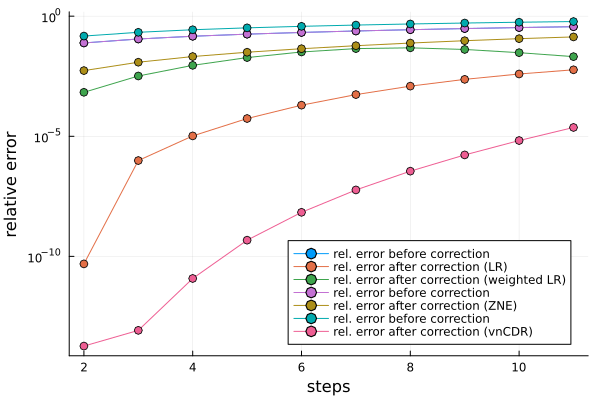

In [ ]:
start = 2

println(size(rel_after_cdr))
println(size(rel_after_weight))
println(size(rel_after_zne))
println(size(rel_before_cdr))
println(size(rel_before_weight))
println(size(rel_before_zne)
)
# plain CDR and weighted CDR
plot(start:trotter.steps, rel_before_cdr[start:end], xlabel="steps",ylabel = "relative error", label="rel. error before correction", marker=:o, legend =:bottomright)
plot!(start:trotter.steps, rel_before_zne[start:end], xlabel="steps", label="rel. error before correction", marker=:o)
plot!(start:trotter.steps, rel_before_vnCDR[start:end], xlabel="steps", label="rel. error before correction", marker=:o)

plot!(start:trotter.steps, rel_after_cdr[start:end], label="rel. error after correction (LR)", marker=:o)
plot!(start:trotter.steps, rel_after_weight[start:end], label="rel. error after correction (weighted LR)", marker=:o)

# plain ZNE
#plot!(start:trotter.steps, rel_before_zne[start:end], xlabel="steps", label="rel. error before correction", marker=:o)
plot!(start:trotter.steps, rel_after_zne[start:end], label="rel. error after correction (ZNE)", marker=:o)

# vnCDR
#plot!(start:trotter.steps, rel_before_vnCDR[start:end], xlabel="steps", label="rel. error before correction", marker=:o)
plot!(start:trotter.steps, rel_after_vnCDR[start:end], label="rel. error after correction (vnCDR)", marker=:o, yscale=:log10)